In [210]:
import pandas as pd
import numpy as np
import requests
from StringIO import StringIO
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as st

% matplotlib inline

In [160]:
# Here is the MetOffice Hadley Centre Daily Observations for rainfall in the South East of the UK.
# See: https://www.metoffice.gov.uk/hadobs/hadukp/data/download.html
# Daily Southeast England precipitation (mm)

# The first 3 rows are explanatory
# The data structure is year,month,day_1...n
# There are always 31 days, but unnecessary cells are set to missing: -99.99
# There is no header, and it appears to be tab delimited.
# Can't get directly from url due to web security, so use requests.

columns = ['Year','Month'] + ['Day_' + str(i) for i in range(1,32)]

rain_url = "https://www.metoffice.gov.uk/hadobs/hadukp/data/daily/HadSEEP_daily_qc.txt"
r = requests.get(rain_url)
rainfall = pd.read_csv(StringIO(r.text),sep=r"\s+",header=None,skiprows=3, names=columns,na_values='-99.99')

In [161]:
# The latest full year is 2017, so let's look at that subset
rain2017 = rainfall[rainfall['Year'] == 2017]
rain2017

,Year,Month,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,...,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31
1032,2017,1,10.17,0.05,0.10,0.19,0.14,5.56,0.38,1.22,...,0.05,0.24,0.22,0.10,0.13,0.70,0.66,13.67,1.70,9.43
1033,2017,2,3.01,1.77,3.58,2.26,0.04,7.62,0.82,0.01,...,1.93,0.47,0.08,1.65,10.49,6.37,1.54,NaN,NaN,NaN
1034,2017,3,1.09,2.23,6.06,3.17,4.54,0.09,2.96,1.17,...,7.88,0.28,0.00,0.00,0.00,0.02,0.44,0.11,0.08,0.10
1035,2017,4,1.03,0.06,1.09,0.14,0.00,0.00,0.03,0.00,...,0.05,0.01,0.52,0.27,1.47,0.87,0.07,0.00,3.18,NaN
1036,2017,5,0.58,1.05,0.81,0.01,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.18,0.34,10.93,0.66,0.05,0.05
1037,2017,6,0.00,4.48,0.09,0.32,17.82,4.80,0.65,3.30,...,0.24,0.03,0.52,0.00,0.01,24.13,2.10,0.05,0.59,NaN
1038,2017,7,0.11,0.12,0.03,0.00,0.03,0.00,0.00,0.00,...,6.90,3.85,0.81,1.12,1.23,3.41,1.61,16.98,0.26,0.04
1039,2017,8,0.29,13.71,0.26,0.17,2.97,0.00,2.37,4.97,...,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.79,4.69,2.86
1040,2017,9,1.38,0.03,5.97,0.22,1.08,0.07,1.65,7.49,...,0.20,0.02,5.39,0.11,0.02,11.95,2.44,0.65,2.83,NaN
1041,2017,10,0.24,0.39,0.01,0.43,0.00,0.11,1.15,0.05,...,0.65,0.51,0.08,0.19,0.77,0.07,0.10,0.03,0.00,0.02


Text(0,0.5,'Precipitation (mm)')

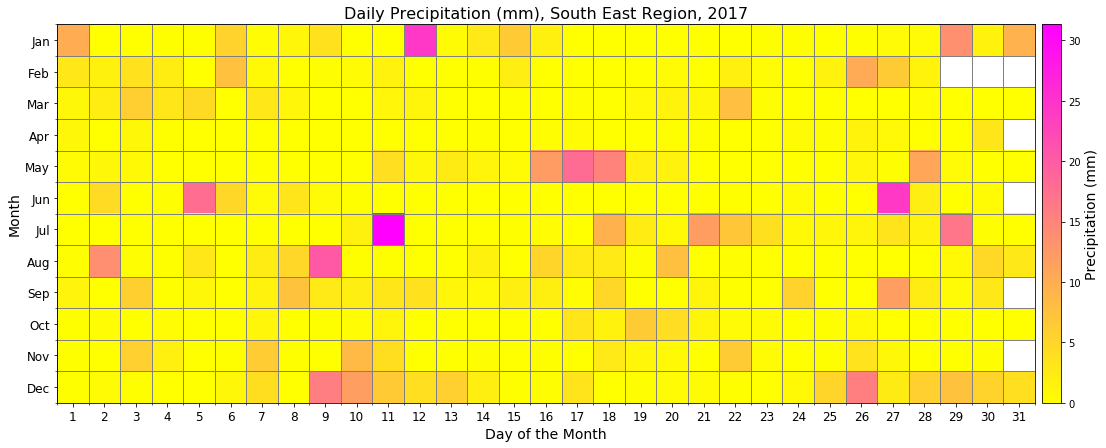

In [4]:
# First, let's see if we can visualise these data usefully.
f, ax = plt.subplots(figsize=(18,8))

rf = ax.imshow(rain2017[rain2017.columns[2:]].values,cmap='spring_r')

# Minor ticks and grid
ax.set_xticks(np.arange(-.5, 31, 1), minor=True)
ax.set_yticks(np.arange(-.5, 12, 1), minor=True)
ax.grid(which = 'minor',color='0.5', linestyle='-', linewidth=1)

# Set Months
ax.set_yticks(np.arange(0, 12, 1))
ax.set_yticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],fontsize=12)
ax.set_ylabel('Month',fontsize=14)

# Set days
ax.set_xticks(np.arange(0, 31, 1))
ax.set_xticklabels(range(1,32),fontsize=12)
ax.set_xlabel('Day of the Month',fontsize=14)

ax.set_title('Daily Precipitation (mm), South East Region, 2017',fontsize=16)

# Add colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
plt.colorbar(rf,cax=cax)
cax.set_ylabel('Precipitation (mm)', fontsize=14)

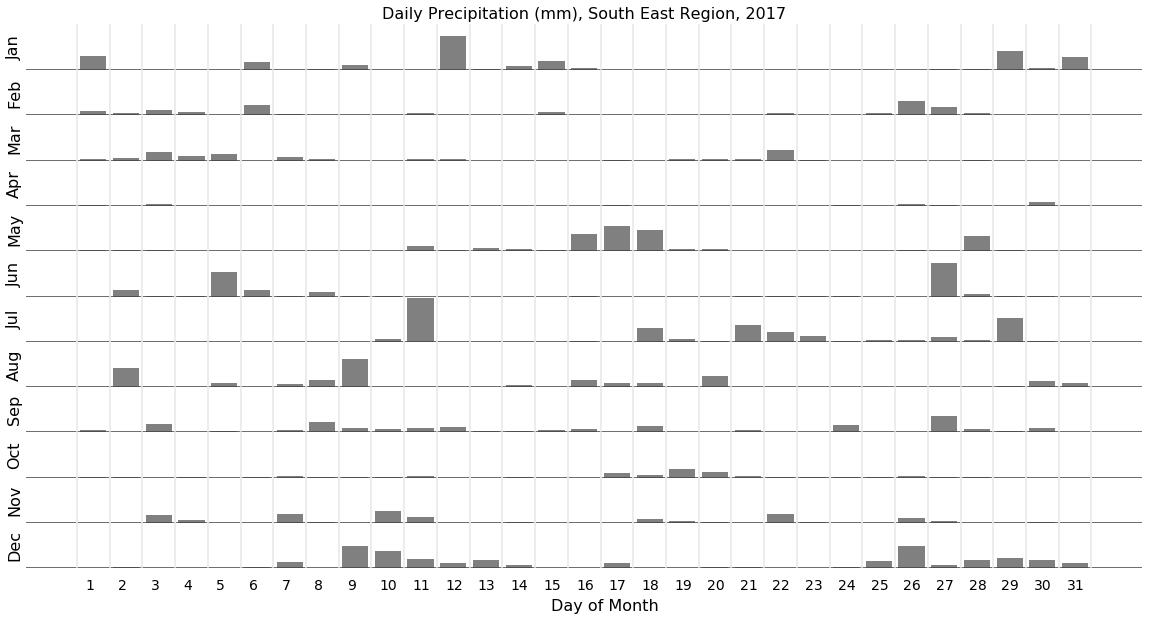

In [62]:
# OK, that works reasonably well
f, ax = plt.subplots(12,1, figsize=(20,10),sharey=True,sharex=True)

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for i in range(0,12):
    # Plot precipitation bars
    ax[i].bar(range(1,32),rain2017[rain2017['Month'] == i+1].values[0][2:],color='0.5')
    
    # Plot baseline
    ax[i].axhline(0,color='0.25',lw=1.5)
    
    # Plot day dividers
    for j in range(0,32):
        ax[i].axvline(j+0.5, color='0.9')
    
    # Add Month labels
    ax[i].set_ylabel(months[i],fontsize=16)
    
    # Remove axis info
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_frame_on(False)

# Add day numbers
for i in range(1,32):
    ax[11].text(i-0.25,-15,str(i),fontsize = 14)
ax[11].text(15,-30,'Day of Month',fontsize = 16)
    
# Add plot title
ax[0].set_title('Daily Precipitation (mm), South East Region, 2017', fontsize=16)
    
plt.subplots_adjust(hspace=-0.01)

In [158]:
# OK, so now we have a sense of the distribution of precipitation.
# Now let's look at what setting different acceptable levels for precipitation does for 'good' and 'bad' days.
# Make a function for this so I can reuse it.
def rainfall_fig(data,threshold = None, cmap='spring_r'):
    
    # Make a plot
    f, ax = plt.subplots(figsize=(18,8))
    
    data = data[data.columns[2:]].values
    
    if threshold:
        # Get nans as boolean array
        nansarr = np.invert(np.isnan(data)).astype(float)
        nansarr[nansarr==0] = np.nan 
        
        # thresholding ignores nans
        thresholdarr = np.ma.masked_where(data>threshold,data).mask.astype(float)
        
        # Reinstate nans
        thresholdarr = thresholdarr * nansarr
        
        rf = ax.imshow(thresholdarr,cmap='Set1_r')
    else:
        rf = ax.imshow(data,cmap=cmap)

    # Minor ticks and grid
    ax.set_xticks(np.arange(-.5, 31, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 12, 1), minor=True)
    ax.grid(which = 'minor',color='0.5', linestyle='-', linewidth=1)

    # Set Months
    ax.set_yticks(np.arange(0, 12, 1))
    ax.set_yticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],fontsize=12)
    ax.set_ylabel('Month',fontsize=14)

    # Set days
    ax.set_xticks(np.arange(0, 31, 1))
    ax.set_xticklabels(range(1,32),fontsize=12)
    ax.set_xlabel('Day of the Month',fontsize=14)
    
    if not threshold:
        # Add colorbar
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="2%", pad=0.1)
        plt.colorbar(rf,cax=cax)
        cax.set_ylabel('Precipitation (mm)', fontsize=14)
    
    return ax

C:\Users\ppehdlew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater


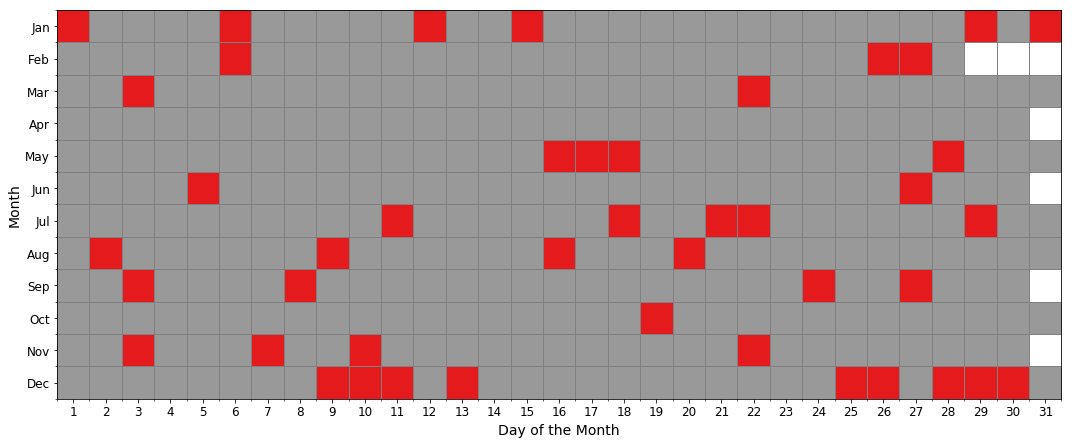

In [159]:
rainfall_fig(rain2017,5);

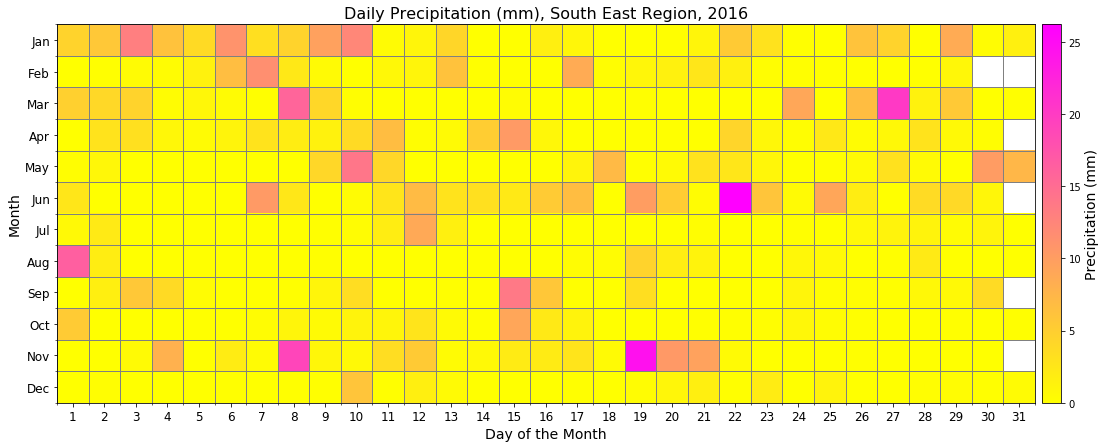

In [166]:
ax = rainfall_fig(rainfall[rainfall['Year'] == 2016])
ax.set_title('Daily Precipitation (mm), South East Region, 2016',fontsize=16);

C:\Users\ppehdlew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater


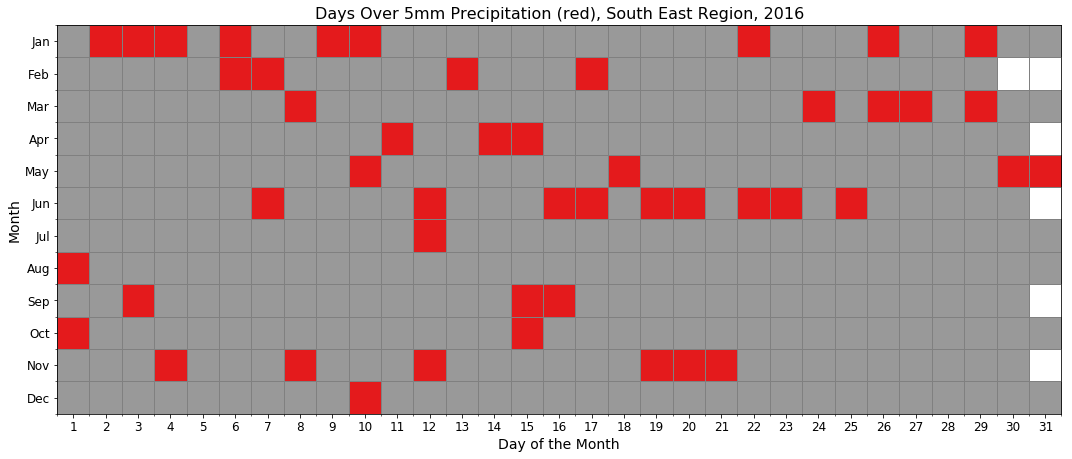

In [168]:
ax = rainfall_fig(rainfall[rainfall['Year'] == 2016],5)
ax.set_title('Days Over 5mm Precipitation (red), South East Region, 2016',fontsize=16);

There appears to be serial correlation in the pattern of 'good' and 'bad' weather, which makes sense, we can test this using a simple non-parametric test.

$\mu = \frac{2tf}{t+f}+1$

where $t$ is the number of true (bad) days, and $f$ is the number of false (good) days, based upon the chosen threshold value.

$\sigma = \sqrt{\frac{2tf(2tf-t-f)}{(t+f)^{2}(t+f-1)}}$

$Z = \frac{(number of runs) - \mu +C}{\sigma}$

Where $C = 0.5$ if number of runs $< \mu$ and $C = -0.5$ if number of runs $> \mu$

Z gives a $p$ value against the standard normal distribution.

The number of runs is given by the number of groups of true and false values in the data TTFFFTFTTT = 5 runs.

In [624]:
def serial_correlation(data,threshold):
    # Data should be a given amount of time of rain data in order.
    data = data[data.columns[2:]].values
    nansarr = np.invert(np.isnan(data)).astype(float)
    nansarr[nansarr==0] = np.nan 
    # thresholding ignores nans
    thresholdarr = np.ma.masked_where(data>threshold,data).mask.astype(float)
    # Reinstate nans
    thresholdarr = thresholdarr * nansarr
    # make a single series
    series = thresholdarr.ravel()
    # Remove nans
    series = series[~np.isnan(series)]
    
    # non parametric test.
    num_true = np.count_nonzero(series)
    num_false = len(series) - num_true
    num_runs = len(np.split(series,np.where(series[1:] != series[:-1])[0] + 1))
    
    mu = (2*num_true*num_false)/float(num_true+num_false) +1
    sigma = np.sqrt((2*num_true*num_false*(2*num_true*num_false-num_true-num_false))/
                    float(np.power(num_true+num_false,2)*(num_true+num_false-1)))
    if num_runs < mu:
        C = 0.5
    else:
        C = -0.5
    Z = num_runs-mu+C/sigma
    
    # Returns z score and p-value (two-sided)
    return Z, st.norm.sf(abs(Z))*2

In [634]:
serial_correlation(rainfall[rainfall['Year'] == 2011],4.4)

C:\Users\ppehdlew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


(-8.2860936622144639, 1.1702863562449508e-16)

In [250]:
def daysofrain(data,threshold):
    # Data should be a given amount of time of rain data in order.
    data = data[data.columns[2:]].values
    nansarr = np.invert(np.isnan(data)).astype(float)
    nansarr[nansarr==0] = np.nan 
    # thresholding ignores nans
    thresholdarr = np.ma.masked_where(data>threshold,data).mask.astype(float)
    # Reinstate nans
    thresholdarr = thresholdarr * nansarr
    return np.nansum(thresholdarr)

C:\Users\ppehdlew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


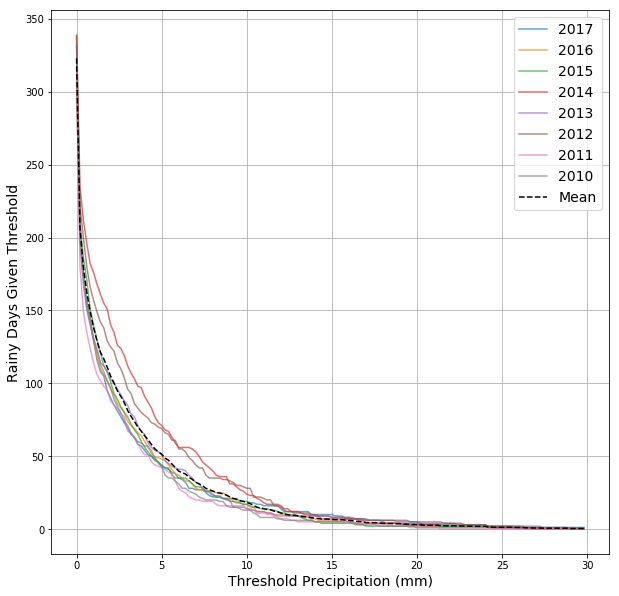

In [495]:
# get days of range for given thresholds
precip = np.arange(0,30,0.2)

f, ax = plt.subplots(figsize = (10,10))
av = []
for year in [2017,2016,2015,2014,2013,2012,2011,2010]:
    dofr = [daysofrain(rainfall[rainfall['Year'] == year],i) for i in precip]
    ax.plot(precip,dofr,label=year,alpha=0.67)
    ax.set_xlabel('Threshold Precipitation (mm)',fontsize = 14)
    ax.set_ylabel('Rainy Days Given Threshold',fontsize = 14)
    av.append(dofr)

# Add a mean line 
ax.plot(precip,np.array(av).mean(axis=0),label='Mean',color='k',linestyle='dashed')
ax.legend(fontsize=14)
ax.grid()
# 2014 and 2012 seem to stand out as having more rainy days for a given threshold in those years.

# See whether cycle hire data can provide a good threshold for rain

In [365]:
# Cycle hire link
cycle_url = "https://data.london.gov.uk/download/number-bicycle-hires/ac29363e-e0cb-47cc-a97a-e216d900a6b0/tfl-daily-cycle-hires.xls"
dailyhires = pd.read_excel(cycle_url, sheetname='Data',usecols=[0,1])
dailyhires.rename(columns={'Day':'Date'},inplace=True)
# Split out the date
dailyhires['Year'] = dailyhires['Date'].dt.year
dailyhires['Month'] = dailyhires['Date'].dt.month
dailyhires['Day'] = dailyhires['Date'].dt.day
dailyhires['Day_Name'] = dailyhires['Date'].dt.weekday_name
# Binary for weekday - 1 = weekday, 0 = weekend day.
dailyhires['Weekday'] = dailyhires['Day_Name'].apply(lambda x: 0 if x in ['Saturday','Sunday'] else 1)

In [448]:
# Get 2017 data
hires2017 = dailyhires[dailyhires['Year']==2017]
hires2017.head()

,Date,Number of Bicycle Hires,Year,Month,Day,Day_Name,Weekday
2347,2017-01-01,6534,2017,1,1,Sunday,0
2348,2017-01-02,11954,2017,1,2,Monday,1
2349,2017-01-03,19622,2017,1,3,Tuesday,1
2350,2017-01-04,22122,2017,1,4,Wednesday,1
2351,2017-01-05,23580,2017,1,5,Thursday,1


In [449]:
# Let's see if we can link the rainfall data to the hire data.
def unpivot_rainfall(data):
    # Get year in question (matters for leap years)
    year = data['Year'].unique()[0]
    # Assumes a year of data.
    data = data[data.columns[2:]].values.ravel()
    # remove nans
    data = data[~np.isnan(data)]
    # Gen dates for year in order.
    dates = pd.date_range(start='01/01/' + str(year) ,end='31/12/' + str(year))
    return pd.DataFrame({'Date':dates,'Precipitation':data})

In [450]:
rain2017_long = unpivot_rainfall(rain2017)

# merge with bike hires on date
hires2017 = hires2017.merge(rain2017_long,on='Date')
hires2017.head()

,Date,Number of Bicycle Hires,Year,Month,Day,Day_Name,Weekday,Precipitation
0,2017-01-01,6534,2017,1,1,Sunday,0,10.17
1,2017-01-02,11954,2017,1,2,Monday,1,0.05
2,2017-01-03,19622,2017,1,3,Tuesday,1,0.10
3,2017-01-04,22122,2017,1,4,Wednesday,1,0.19
4,2017-01-05,23580,2017,1,5,Thursday,1,0.14


In [451]:
# Generate some precipitation classes
for precip in np.arange(0,20,0.2):
    hires2017['Precip_'+ str(precip)] = hires2017['Precipitation'].apply(lambda x: 1 if x > precip else 0)

In [754]:
#hires2017['log_precip'] = hires2017['Precipitation'].apply(lambda x: np.log(x) if x > 0.0 else np.log(0.001))
#hires2017['root_precip'] = np.power(hires2017['Precipitation'],0.15)

In [756]:
# Model the effect of precipitation threshold on cycle hire usage
import statsmodels.formula.api as smf

# The model is the effect of precipitation on hires controlling for weekday and month.
# NB Precipitation is quite skewed, but also quite hard to transform!
formula1 = 'Q(\'Number of Bicycle Hires\') ~ root_precip + C(Weekday) + C(Month)'
res1 = smf.ols(formula1,data=hires2017).fit()
res1.summary()

# The model is the effect of precipitation on hires controlling for weekday and month.
# Try categorising precipitation
hires2017['Precip_cat'] = pd.cut(hires2017['Precipitation'], bins=[0,0.001,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,100], include_lowest=True,
       labels=['0','0-1','01-2','02-3','03-4','04-5','05-6','06-7','07-8','08-9','09-10','10-11','11-12','12-13','13-14','14-15','15+'])

formula2 = 'Q(\'Number of Bicycle Hires\') ~ C(Precip_cat) + C(Weekday) + C(Month)'
res2 = smf.ols(formula2,data=hires2017).fit()
res2.summary()

# The 4-5mm cat and the 6-7mm cats look most interesting on t-value - the ratio of coeff to precision (std. err.)
# Explore this further.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Q('Number of Bicycle Hires')   R-squared:                       0.731
Model:                                      OLS   Adj. R-squared:                  0.709
Method:                           Least Squares   F-statistic:                     33.84
Date:                          Thu, 12 Jul 2018   Prob (F-statistic):           1.42e-79
Time:                                  15:31:54   Log-Likelihood:                -3575.2
No. Observations:                           365   AIC:                             7206.
Df Residuals:                               337   BIC:                             7316.
Df Model:                                    27                                         
Covariance Type:                      nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.026e+04   1131.186     17.912      0.000     1.8e+04    2.25e+04
C(Precip_cat)[T.0-1]   -3140.5594    732.697     -4.286      0.000   -4581.795   -1699.323
C(Precip_cat)[T.01-2]  -4341.2441    973.217     -4.461      0.000   -6255.589   -2426.900
C(Precip_cat)[T.02-3]  -5744.8750   1212.585     -4.738      0.000   -8130.065   -3359.685
C(Precip_cat)[T.03-4]  -5326.6008   1357.431     -3.924      0.000   -7996.706   -2656.496
C(Precip_cat)[T.04-5]  -8928.5909   1569.053     -5.690      0.000    -1.2e+04   -5842.219
C(Precip_cat)[T.05-6]  -3860.4964   1708.412     -2.260      0.024   -7220.991    -500.002
C(Precip_cat)[T.06-7]  -9067.6172   1756.617     -5.162      0.000   -1.25e+04   -5612.302
C(Precip_cat)[T.07-8]  -9668.9703   2152.528     -4.492      0.000   -1.39e+04   -5434.888
C(Precip_cat)[T.08-9]  -3592.0749   4650.563     -0.772      0.440   -1.27e+04    5555.714
C(Precip_cat)[T.09-10] -2352.4855   3312.298     -0.710      0.478   -8867.870    4162.899
C(Precip_cat)[T.10-11] -7712.7191   2747.074     -2.808      0.005   -1.31e+04   -2309.147
C(Precip_cat)[T.11-12] -7852.3736   3327.498     -2.360      0.019   -1.44e+04   -1307.090
C(Precip_cat)[T.12-13] -2755.1123   3292.273     -0.837      0.403   -9231.106    3720.881
C(Precip_cat)[T.13-14] -1.086e+04   3303.084     -3.287      0.001   -1.74e+04   -4358.360
C(Precip_cat)[T.14-15] -8.898e-12   2.41e-12     -3.692      0.000   -1.36e-11   -4.16e-12
C(Precip_cat)[T.15+]   -1.445e+04   1571.166     -9.199      0.000   -1.75e+04   -1.14e+04
C(Weekday)[T.1]         6474.7519    535.489     12.091      0.000    5421.430    7528.074
C(Month)[T.2]           1397.5748   1195.384      1.169      0.243    -953.780    3748.930
C(Month)[T.3]           5134.0110   1169.273      4.391      0.000    2834.018    7434.004
C(Month)[T.4]           8194.2132   1194.769      6.858      0.000    5844.069    1.05e+04
C(Month)[T.5]           1.031e+04   1193.801      8.636      0.000    7961.013    1.27e+04
C(Month)[T.6]           1.499e+04   1197.935     12.516      0.000    1.26e+04    1.73e+04
C(Month)[T.7]           1.566e+04   1171.049     13.372      0.000    1.34e+04     1.8e+04
C(Month)[T.8]           1.091e+04   1189.633      9.174      0.000    8573.892    1.33e+04
C(Month)[T.9]           1.099e+04   1200.165      9.155      0.000    8626.383    1.33e+04
C(Month)[T.10]          9992.3201   1165.527      8.573      0.000    7699.696    1.23e+04
C(Month)[T.11]          5335.5467   1183.764      4.507      0.000    3007.049    7664.045
C(Month)[T.12]         -2443.6985   1184.651     -2.063      0.040   -4773.940    -113.457
=============================================================

In [464]:
# Get 2016 data
hires2016 = dailyhires[dailyhires['Year']==2016]

rain2016_long = unpivot_rainfall(rainfall[rainfall['Year'] == 2016])

# merge with bike hires on date
hires2016 = hires2016.merge(rain2016_long,on='Date')
hires2016.head()

# Generate some precipitation classes
for precip in np.arange(0,20,0.2):
    hires2016['Precip_'+ str(precip)] = hires2016['Precipitation'].apply(lambda x: 1 if x > precip else 0)
    
# Get 2015 data
hires2015 = dailyhires[dailyhires['Year']==2015]

rain2015_long = unpivot_rainfall(rainfall[rainfall['Year'] == 2015])

# merge with bike hires on date
hires2015 = hires2015.merge(rain2015_long,on='Date')
hires2015.head()

# Generate some precipitation classes
for precip in np.arange(0,20,0.2):
    hires2015['Precip_'+ str(precip)] = hires2015['Precipitation'].apply(lambda x: 1 if x > precip else 0)

# Get 2014 data
hires2014 = dailyhires[dailyhires['Year']==2014]

rain2014_long = unpivot_rainfall(rainfall[rainfall['Year'] == 2014])

# merge with bike hires on date
hires2014 = hires2014.merge(rain2014_long,on='Date')
hires2014.head()

# Generate some precipitation classes
for precip in np.arange(0,20,0.2):
    hires2014['Precip_'+ str(precip)] = hires2014['Precipitation'].apply(lambda x: 1 if x > precip else 0)
    
# Get 2013 data
hires2013 = dailyhires[dailyhires['Year']==2013]

rain2013_long = unpivot_rainfall(rainfall[rainfall['Year'] == 2013])

# merge with bike hires on date
hires2013 = hires2013.merge(rain2013_long,on='Date')
hires2013.head()

# Generate some precipitation classes
for precip in np.arange(0,20,0.2):
    hires2013['Precip_'+ str(precip)] = hires2013['Precipitation'].apply(lambda x: 1 if x > precip else 0)
    
# Get 2012 data
hires2012 = dailyhires[dailyhires['Year']==2012]

rain2012_long = unpivot_rainfall(rainfall[rainfall['Year'] == 2012])

# merge with bike hires on date
hires2012 = hires2012.merge(rain2012_long,on='Date')
hires2012.head()

# Generate some precipitation classes
for precip in np.arange(0,20,0.2):
    hires2012['Precip_'+ str(precip)] = hires2012['Precipitation'].apply(lambda x: 1 if x > precip else 0)
    
# Get 2011 data
hires2011 = dailyhires[dailyhires['Year']==2011]

rain2011_long = unpivot_rainfall(rainfall[rainfall['Year'] == 2011])

# merge with bike hires on date
hires2011 = hires2011.merge(rain2011_long,on='Date')
hires2011.head()

# Generate some precipitation classes
for precip in np.arange(0,20,0.2):
    hires2011['Precip_'+ str(precip)] = hires2011['Precipitation'].apply(lambda x: 1 if x > precip else 0)

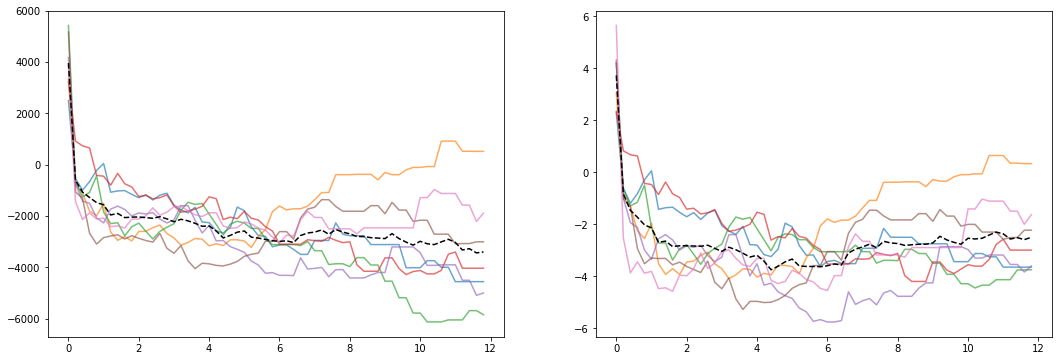

In [757]:
# The model is the effect of precipitation  on hires controlling for weekday and month.
f, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))

av_effect = []
av_t = []
# Run the model for all years
for dataset in [hires2017,hires2016,hires2015,hires2014,hires2013,hires2012,hires2011]:
    precip_effect = []
    precip_t = []
    precip_se = []
    # Use standardised hire numbers
    #dataset['hires_zscore'] = st.zscore(dataset['Number of Bicycle Hires'])
    dataset['log_precip'] = dataset['Precipitation'].apply(lambda x: np.log(x) if x > 0.0 else np.log(0.001))
    # Test all of the precipitation values and get effect size
    for precip in np.arange(0,12,0.2):
        formula = 'Q(\'Number of Bicycle Hires\') ~ C(Q(\'Precip_' + str(precip) + '\')) + log_precip + C(Weekday) + C(Month)'
        #formula = 'hires_zscore ~ C(Q(\'Precip_' + str(precip) + '\')) + C(Weekday) + C(Month)'
        res = smf.ols(formula,data=dataset).fit()
        precip_effect.append(res.params['C(Q(\'Precip_' + str(precip) + '\'))[T.1]'])
        precip_t.append(res.tvalues['C(Q(\'Precip_' + str(precip) + '\'))[T.1]'])
        precip_se.append(res.bse['C(Q(\'Precip_' + str(precip) + '\'))[T.1]'])
    
    # plot the effect size and the t value
    # NB effect is the increase/decrease in the outcome given a transition from not rainy to rainy.
    # NB t value is the effect size/std err. therefore it's effect size relative to precision. Larger means better quality.
    ax1.plot(np.arange(0,12,0.2),precip_effect,alpha=0.66)
    ax2.plot(np.arange(0,12,0.2),precip_t,alpha=0.66)
    av_effect.append(precip_effect)
    av_t.append(precip_t)

ax1.plot(np.arange(0,12,0.2),np.array(av_effect).mean(axis=0),color='k',linestyle='dashed')
ax2.plot(np.arange(0,12,0.2),np.array(av_t).mean(axis=0),color='k',linestyle='dashed')

In [497]:
# Basically, rain has a pretty consistent effect on usage, more rain = lower usage.
# The biggest magnitude of change is from nothing to any observed rain, and then any rain to 0.2mm plus.
# However, this implies 323 and 207 'bad' days per year, on average, which I'm not sure is

# I think 4.4m is an interesting candidates for threshold. It almost has the biggest effect on hires
# The t -value for 4.4mm is also the largest, owing to the better precision compared to 6.4mm, the other candidate.
# This implies, on average, around 'bad' days per year.
# However, I'm not 100% sure about the fact I'm controlling for precipitation (logged) as well as the binary variable...
# The divergence of trajectories after 5.5mm ish makes me prefer the 4.4mm value too.

# Data generating mechanism for good/bad weather days
# Basic Markov Chain
Technically, I think this is a time-homogeneous Markov chain

In [812]:
# Simple 2 state markov chain.
def empirical_transition_matrix(series):
    series = series.values
    serieslag = np.roll(series,1)
    ct = pd.crosstab(series,serieslag).values
    return ct/ct.sum(axis=1,keepdims=True).astype(float)

def make_pattern(P,chance_true=0.5,n=365):
    # Pick starting value based on global probability of seeing a 1.
    # Default is 50/50 chance.
    pattern = [0 if np.random.rand() > chance_true else 1]
        
    for i in range(1,n):
        new_state = 0 if np.random.rand() < P[pattern[i-1]][0] else 1
        pattern.append(new_state)
    return pattern

In [603]:
# Make sequences for 4.4mm precipitation for multiple years.
rain2017_long['Precip_4.4'] = rain2017_long['Precipitation'].apply(lambda x: 1 if x > 4.4 else 0)
rain2016_long['Precip_4.4'] = rain2016_long['Precipitation'].apply(lambda x: 1 if x > 4.4 else 0)
rain2015_long['Precip_4.4'] = rain2015_long['Precipitation'].apply(lambda x: 1 if x > 4.4 else 0)
rain2014_long['Precip_4.4'] = rain2014_long['Precipitation'].apply(lambda x: 1 if x > 4.4 else 0)
rain2013_long['Precip_4.4'] = rain2013_long['Precipitation'].apply(lambda x: 1 if x > 4.4 else 0)
rain2012_long['Precip_4.4'] = rain2012_long['Precipitation'].apply(lambda x: 1 if x > 4.4 else 0)
rain2011_long['Precip_4.4'] = rain2011_long['Precipitation'].apply(lambda x: 1 if x > 4.4 else 0)

# Estimate a transition matrix for multiple years
P_2017 = empirical_transition_matrix(rain2017_long['Precip_4.4'])
P_2016 = empirical_transition_matrix(rain2016_long['Precip_4.4'])
P_2015 = empirical_transition_matrix(rain2015_long['Precip_4.4'])
P_2014 = empirical_transition_matrix(rain2014_long['Precip_4.4'])
P_2013 = empirical_transition_matrix(rain2013_long['Precip_4.4'])
P_2012 = empirical_transition_matrix(rain2012_long['Precip_4.4'])
P_2011 = empirical_transition_matrix(rain2011_long['Precip_4.4'])

In [652]:
# transition matrices for recent years.
# The prob of staying 'not rainy' is quite stable (82% -> 89%) over time.
# The prob of staying 'rainy' is much more variable (18% -> 45%) over time.
for p_mat in [P_2017,P_2016,P_2015,P_2014,P_2013,P_2012,P_2011]:
    print p_mat
    print ''

[[ 0.87619048  0.12380952]
 [ 0.78        0.22      ]]

[[ 0.87820513  0.12179487]
 [ 0.7037037   0.2962963 ]]

[[ 0.86984127  0.13015873]
 [ 0.82        0.18      ]]

[[ 0.81914894  0.18085106]
 [ 0.61445783  0.38554217]]

[[ 0.88349515  0.11650485]
 [ 0.64285714  0.35714286]]

[[ 0.86348123  0.13651877]
 [ 0.54794521  0.45205479]]

[[ 0.88714734  0.11285266]
 [ 0.7826087   0.2173913 ]]



In [615]:
# Let's add all the long rain files together to make a really long sequence.

seqs = [rain2017_long['Precip_4.4'], rain2016_long['Precip_4.4'], rain2015_long['Precip_4.4'], rain2014_long['Precip_4.4'],
        rain2013_long['Precip_4.4'], rain2012_long['Precip_4.4'], rain2011_long['Precip_4.4']]

seqs = pd.concat(seqs,axis=0)

P = empirical_transition_matrix(seqs)
P

array([[ 0.86946387,  0.13053613],
       [ 0.67961165,  0.32038835]])

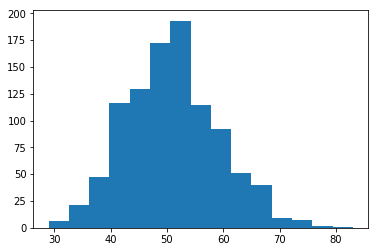

In [817]:
# Let's define a transition matrix.
P = np.array([[0.886,0.114],
              [0.699,0.301]])

# Check to see whether the number of days of bad weather is generally c.51
counts = []
for i in range(0,1000):
    seq = make_pattern(P,0.14)
    counts.append(sum(seq))
# Look at distribution of sequence serial correlation
plt.hist(counts,bins=15);
# centred over 51 'bad' days, good!

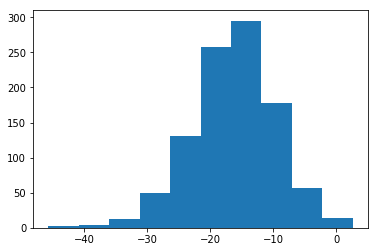

In [818]:
def serial_correlation(sequence):
    series = np.array(sequence)
    
    # non parametric test.
    num_true = np.count_nonzero(series)
    num_false = len(series) - num_true
    num_runs = len(np.split(series,np.where(series[1:] != series[:-1])[0] + 1))
    
    mu = (2*num_true*num_false)/float(num_true+num_false) +1
    sigma = np.sqrt((2*num_true*num_false*(2*num_true*num_false-num_true-num_false))/
                    float(np.power(num_true+num_false,2)*(num_true+num_false-1)))
    if num_runs < mu:
        C = 0.5
    else:
        C = -0.5
    Z = num_runs-mu+C/sigma
    
    # Returns z score and p-value (two-sided)
    return Z, st.norm.sf(abs(Z))*2

# Let's take a look at the sequence.
corrs = []
for i in range(0,1000):
    seq = make_pattern(P,0.14)
    corrs.append(serial_correlation(seq)[0])
# Look at distribution of sequence serial correlation
plt.hist(corrs);
# This is good, real values range from -5 to -37, depending on the year.

In [727]:
def sequence_to_year(sequence):
    # Assumes a 365 day calendar year.
    # Insert nans to allow for a square matrix with 31 columns
    for i in [59,60,61,123,185,278,340]:
        sequence.insert(i,np.nan)
    sequence = np.array(sequence)
    return np.reshape(sequence,(-1,31))

def sim_rainfall_fig(data, cmap='spring_r'):
    # Make a plot
    f, ax = plt.subplots(figsize=(18,8))
           
    rf = ax.imshow(data,cmap='Set1_r')

    # Minor ticks and grid
    ax.set_xticks(np.arange(-.5, 31, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 12, 1), minor=True)
    ax.grid(which = 'minor',color='0.5', linestyle='-', linewidth=1)

    # Set Months
    ax.set_yticks(np.arange(0, 12, 1))
    ax.set_yticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],fontsize=12)
    ax.set_ylabel('Month',fontsize=14)

    # Set days
    ax.set_xticks(np.arange(0, 31, 1))
    ax.set_xticklabels(range(1,32),fontsize=12)
    ax.set_xlabel('Day of the Month',fontsize=14)
    
    return ax

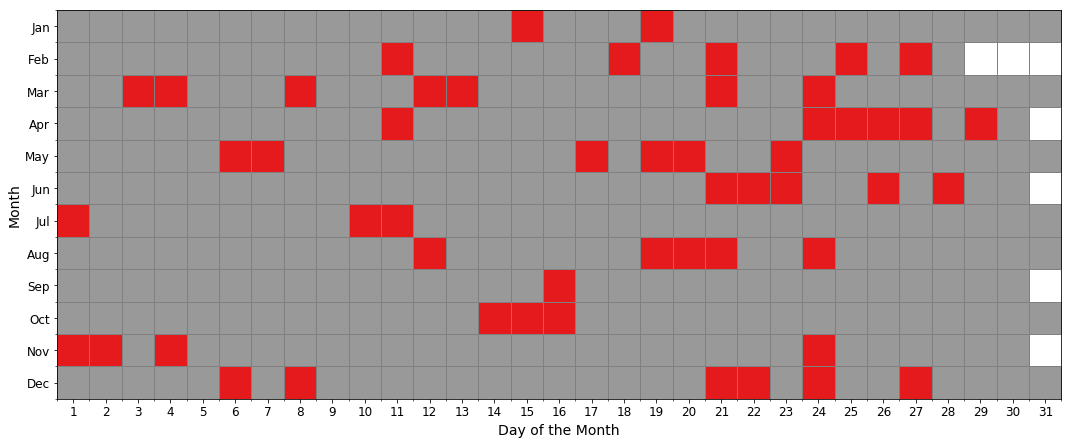

In [819]:
seq = make_pattern(P,0.14)
sim_year = sequence_to_year(seq)
sim_rainfall_fig(sim_year)

In [783]:
# Consider variation by month.
# Need to pool the data to get enough power to figure things out on average.
#rain_long = [rain2017_long, rain2016_long, rain2015_long, rain2014_long, rain2013_long, rain2012_long, rain2011_long]
#rain_long = pd.concat(rain_long,axis=0)
#rain_long['Month'] = rain_long['Date'].dt.month
res = smf.Logit.from_formula('Q(\'Precip_4.4\') ~ C(Month) - 1',data=rain_long).fit(method='ncg')
res.summary()
# Because I've removed the intercept, the coefficients are relative to 0 days of rain.
# All terms are significant, because no month has on average no rain.
# There is variation in monthly precipitation though. There are generally fewer rainy day in March, April and August.
# It is most rainy in January and December.
# This suggests that a data generating mechanism should consider monthly variation in rainy days.

Optimization terminated successfully.
         Current function value: 0.433093
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 12
         Hessian evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Q('Precip_4.4')   No. Observations:                 2557
Model:                          Logit   Df Residuals:                     2545
Method:                           MLE   Df Model:                           11
Date:                Thu, 12 Jul 2018   Pseudo R-squ.:                 0.01911
Time:                        17:01:15   Log-Likelihood:                -1107.4
converged:                       True   LL-Null:                       -1129.0
                                        LLR p-value:                 1.018e-05
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
C(Month)[1]     -0.9619      0.152     -6.338      0.000      -1.259      -0.664
C(Month)[2]     -1.6840      0.196     -8.611      0.000      -2.067      -1.301
C(Month)[3]     -2.1324      0.221     -9.669      0.000      -2.565      -1.700
C(Month)[4]     -2.1454      0.225     -9.521      0.000      -2.587      -1.704
C(Month)[5]     -1.7546      0.191     -9.165      0.000      -2.130      -1.379
C(Month)[6]     -1.6441      0.187     -8.776      0.000      -2.011      -1.277
C(Month)[7]     -1.8691      0.200     -9.369      0.000      -2.260      -1.478
C(Month)[8]     -1.6831      0.187     -9.013      0.000      -2.049      -1.317
C(Month)[9]     -2.1454      0.225     -9.521      0.000      -2.587      -1.704
C(Month)[10]    -1.5820      0.181     -8.764      0.000      -1.936      -1.228
C(Month)[11]    -1.4469      0.176     -8.234      0.000      -1.791      -1.102
C(Month)[12]    -1.2587      0.164     -7.696      0.000      -1.579      -0.938
================================================================================
"""

In [820]:
# The basic Markov process lacks seasonality, as evidenced here.
seq = []
months = []
for i in range(0,1000):
    seq += make_pattern(P,0.14)
    months += list(pd.date_range(start='01/01/2017',end='31/12/2017').month)
seq_month = pd.DataFrame({'precip':seq,'Month':months})
res = smf.Logit.from_formula('precip ~ C(Month) - 1',data=seq_month).fit(method='ncg')
res.summary()
# As is evident here, the likelihood of a rainy day is basically the same across months.
# Month explains NONE of the variation in rainy days!

Optimization terminated successfully.
         Current function value: 0.407037
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 10
         Hessian evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 precip   No. Observations:               365000
Model:                          Logit   Df Residuals:                   364988
Method:                           MLE   Df Model:                           11
Date:                Thu, 12 Jul 2018   Pseudo R-squ.:               6.169e-05
Time:                        17:23:52   Log-Likelihood:            -1.4857e+05
converged:                       True   LL-Null:                   -1.4858e+05
                                        LLR p-value:                   0.07418
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
C(Month)[1]     -1.8215      0.016   -111.032      0.000      -1.854      -1.789
C(Month)[2]     -1.7970      0.017   -105.025      0.000      -1.831      -1.763
C(Month)[3]     -1.7948      0.016   -110.460      0.000      -1.827      -1.763
C(Month)[4]     -1.7642      0.016   -107.979      0.000      -1.796      -1.732
C(Month)[5]     -1.8123      0.016   -110.840      0.000      -1.844      -1.780
C(Month)[6]     -1.7971      0.017   -108.714      0.000      -1.830      -1.765
C(Month)[7]     -1.8274      0.016   -111.155      0.000      -1.860      -1.795
C(Month)[8]     -1.7798      0.016   -110.125      0.000      -1.812      -1.748
C(Month)[9]     -1.8117      0.017   -109.024      0.000      -1.844      -1.779
C(Month)[10]    -1.8073      0.016   -110.731      0.000      -1.839      -1.775
C(Month)[11]    -1.8111      0.017   -109.012      0.000      -1.844      -1.779
C(Month)[12]    -1.8437      0.017   -111.487      0.000      -1.876      -1.811
================================================================================
"""

# Monthly Markov Chain

In [892]:
# As far as I can tell, a seasonal markov process is the same as a basic markov process.
# Except that the transition is contigent on a separate transition matrix depending on the month in question.
# Effectively, transition probabilities change with month.
# First, let's get a sense of how many rainy days we expect per month, from the annual 51 ish.
for month in [1,2,3,4,5,6,7,8,9,10,11,12]:
    av_days = (rain_long[rain_long['Month'] == month]['Precip_4.4'].sum()/7.0)*0.86650485437
    if month in [1,3,5,7,8,10,12]:
        print month, av_days, av_days/31.0
    elif month in [4,6,9,11]:
        print month, av_days, av_days/30.0
    else:
        # Adjust for leap years in February
        print month, av_days, av_days/((28.0*5.0 +29.0*2.0)/7.0)

# Evidently quite a bit of variation in rainy days - 10% in March, April, September up to 28% in Jan, 22% in Dec.
# Have to deflate the averages, otherwise they add up to 59 days rainy per year. Scale by 0.86650485437

1 7.42718446603 0.239586595678
2 3.83737864078 0.135664901442
3 2.84708737864 0.0918415283434
4 2.72330097088 0.0907766990292
5 3.96116504855 0.127779517695
6 4.20873786408 0.140291262136
7 3.58980582525 0.115800187911
8 4.20873786408 0.135765737551
9 2.72330097088 0.0907766990292
10 4.58009708738 0.147745067335
11 4.95145631069 0.16504854369
12 5.94174757282 0.191669276543


In [854]:
# Let's look at monthly conditional probabilities of having consecutive rainy days.
# Add year to datatable
#rain_long['Year'] = rain_long['Date'].dt.year

for month in range(1,13):
    m_seq = []
    for year in [2017,2016,2015,2014,2013,2012,2011]:
        # Here I'm trying to use all the monthly data for 7 years to get a conditional probability
        # The average of yearly estimates tend to be lower.
        m_seq += rain_long[((rain_long['Year']==year) & (rain_long['Month']==month))]['Precip_4.4'].tolist() + [np.nan]
    m_seq = pd.Series(m_seq[:-1])
    print empirical_transition_matrix(m_seq)[1][1]

0.421052631579
0.290322580645
0.227272727273
0.454545454545
0.290322580645
0.181818181818
0.310344827586
0.30303030303
0.227272727273
0.333333333333
0.3
0.404255319149


In [904]:
calc(0.192,0.404)

(0.858, 0.142)

In [905]:
transition_matrices = {'Jan': [[0.817, 0.183],
                               [0.579, 0.421]],
                       'Feb': [[0.888, 0.112],
                               [0.710, 0.290]],
                       'Mar': [[0.922, 0.078],
                               [0.773, 0.227]],
                       'Apr': [[0.945, 0.055],
                               [0.545, 0.455]],
                       'May': [[0.896, 0.104],
                               [0.710, 0.290]],
                       'Jun': [[0.867, 0.133],
                               [0.818, 0.182]],
                       'Jul': [[0.909, 0.091],
                               [0.690, 0.310]],
                       'Aug': [[0.890, 0.110],
                               [0.697, 0.303]],
                       'Sep': [[0.923, 0.077],
                               [0.773, 0.227]],
                       'Oct': [[0.884, 0.116],
                               [0.667, 0.333]],
                       'Nov': [[0.862, 0.138],
                               [0.700, 0.300]],
                       'Dec': [[0.858, 0.142],
                               [0.596, 0.404]]}

In [906]:
def make_monthly_pattern(P,chance_true=0.5):
    # Pick starting value based on global probability of seeing a 1.
    # Default is 50/50 chance.
    pattern = [0 if np.random.rand() > chance_true else 1]
    monthlist = ['Jan']*30 + ['Feb']*28 + ['Mar']*31 + ['Apr']*30 + ['May']*31 + ['Jun']*30 + ['Jul']*31 + ['Aug']*31 + ['Sep']*30 + ['Oct']*31 + ['Nov']*30 + ['Dec']*31
    for i,m in enumerate(monthlist):
        new_state = 0 if np.random.rand() < P[m][pattern[i]][0] else 1
        pattern.append(new_state)
    return pattern

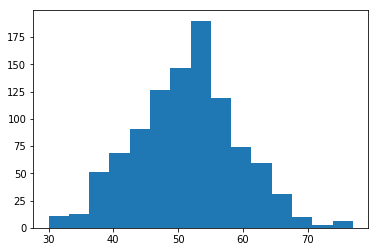

In [938]:
# Check to see whether the number of days of bad weather is generally c.50
counts = []
for i in range(0,1000):
    # NB 0.24 is the January mean probability of a bad day.
    seq = make_monthly_pattern(transition_matrices,0.24)
    counts.append(sum(seq))
# Look at distribution of sequence serial correlation
plt.hist(counts,bins=15);
# centred over 51 'bad' days, good!

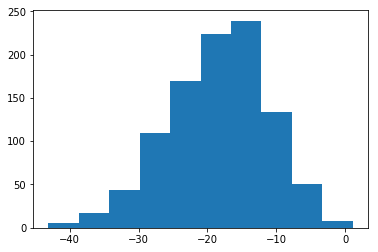

In [941]:
# Check to see if we reproduce the serial correlation
# Let's take a look at the sequence.
corrs = []
for i in range(0,1000):
    seq = make_monthly_pattern(transition_matrices,0.24)
    corrs.append(serial_correlation(seq)[0])
# Look at distribution of sequence serial correlation
plt.hist(corrs);
# This is good, real values range from -5 to -37, depending on the year.

In [943]:
# The basic Markov process lacks seasonality, let's see if the monthly Markov chain shows dependency.
seq = []
months = []
for i in range(0,1000):
    seq += make_monthly_pattern(transition_matrices,0.24)
    months += list(pd.date_range(start='01/01/2017',end='31/12/2017').month)
seq_month = pd.DataFrame({'precip':seq,'Month':months})
res = smf.Logit.from_formula('precip ~ C(Month) - 1',data=seq_month).fit(method='ncg')
res.summary()
# Yes! It looks like the monthly Markov chain works!

Optimization terminated successfully.
         Current function value: 0.397238
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 12
         Hessian evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 precip   No. Observations:               365000
Model:                          Logit   Df Residuals:                   364988
Method:                           MLE   Df Model:                           11
Date:                Fri, 13 Jul 2018   Pseudo R-squ.:                 0.01746
Time:                        10:38:26   Log-Likelihood:            -1.4499e+05
converged:                       True   LL-Null:                   -1.4757e+05
                                        LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
C(Month)[1]     -1.1598      0.013    -87.048      0.000      -1.186      -1.134
C(Month)[2]     -1.8335      0.017   -105.759      0.000      -1.867      -1.800
C(Month)[3]     -2.2922      0.020   -116.515      0.000      -2.331      -2.254
C(Month)[4]     -2.2720      0.020   -114.550      0.000      -2.311      -2.233
C(Month)[5]     -1.9251      0.017   -112.973      0.000      -1.959      -1.892
C(Month)[6]     -1.8106      0.017   -109.000      0.000      -1.843      -1.778
C(Month)[7]     -2.0199      0.018   -114.365      0.000      -2.055      -1.985
C(Month)[8]     -1.8633      0.017   -111.869      0.000      -1.896      -1.831
C(Month)[9]     -2.3173      0.020   -114.692      0.000      -2.357      -2.278
C(Month)[10]    -1.7785      0.016   -110.095      0.000      -1.810      -1.747
C(Month)[11]    -1.6378      0.016   -104.719      0.000      -1.668      -1.607
C(Month)[12]    -1.4174      0.014    -98.890      0.000      -1.446      -1.389
================================================================================
"""

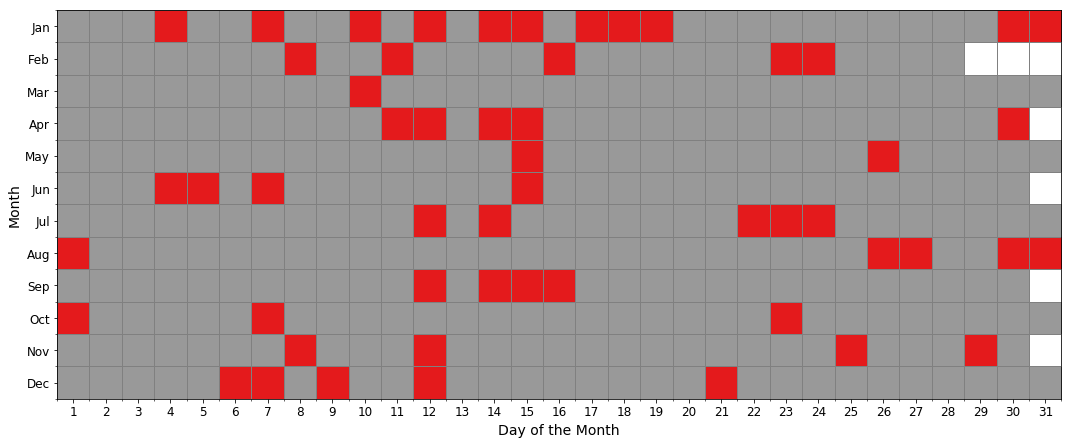

In [1041]:
# Let's look at a couple of simulated runs
seq = make_monthly_pattern(transition_matrices,0.24)
sim_year = sequence_to_year(seq)
sim_rainfall_fig(sim_year)

In [1060]:
# Now, with the basic Markov chain you can just generate n=260 len sequences.
# However, due to the monthly dependency we need a method for extracting working days from a year long sequence.
# Let's assume 1 = Monday, 2 = Tuesday, 3 = Wednesday, ... , 7 = Sunday.
# This returns either 260 or 261, weekdays in a year depending on the starting day.
# Monday, Tuesday, Wednesday, Thursday, Friday starts give 261 working days.
# Saturday or Sunday starts give 260 working days.

def get_working_days(seq, startday = None):
    if startday in [1,2,3,4,5,6,7]:
        day = startday
    else:
        # Randomly pick a starting day
        day = np.random.randint(1,8)
    day_of_year = 0
    days = []
    while day_of_year < 365:
        # if day is Sunday, reset to Monday
        if day == 7:
            days.append(day)
            day = 1
        else:
            days.append(day)
            day += 1       
        # Increment the day of the year.
        day_of_year += 1
    temp = np.array(zip(wds,seq))
    # Return the sequence without weekend entries
    return temp[~(temp[:,0] ==6) &~(temp[:,0] ==7),1]

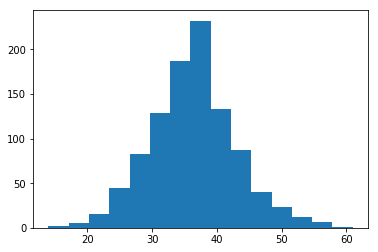

In [1075]:
# how many bad days do you get accounting for weekends?
counts = []
for i in range(0,1000):
    # NB 0.24 is the January mean probability of a bad day.
    seq = make_monthly_pattern(transition_matrices,0.24)
    seq = get_working_days(seq)
    counts.append(sum(seq))
# Look at distribution of sequence serial correlation
plt.hist(counts,bins=15);
# centred over 36 'bad' days.